In [159]:
import numpy as np
import matplotlib.pyplot as plt
from funcs import rand_TAC
from stats import stat,skewness,kurtosis

In [160]:
def f(x,A):
    if x>0 and x<(3*np.pi/2):
        return A*(np.cos(x)*np.cos(x))
    return 0

Plotting the function

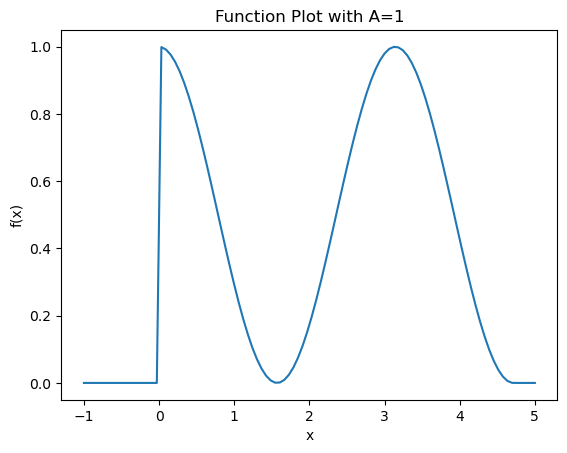

In [161]:
x = np.linspace(-1,5,100)
y = [f(i,1) for i in x]

plt.plot(x,y)
plt.title("Function Plot with A=1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

<h3>Finding Area for Nomalization

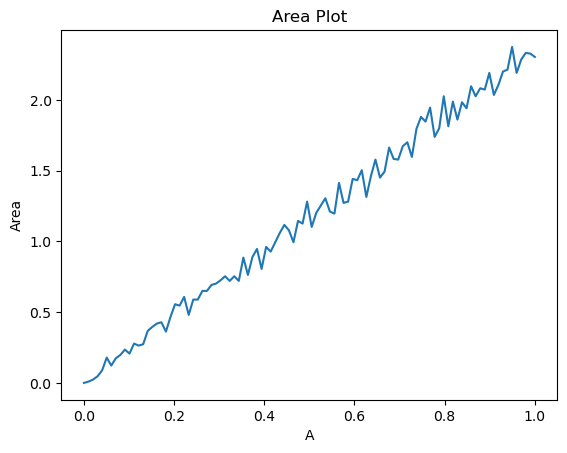

In [162]:
A_s = np.linspace(0,1,100)
areas = [Hit_or_miss(f,xmin,xmax,1,N=1000,A=i)[0] for i in A_s]
plt.plot(A_s,areas)
plt.title("Area Plot")
plt.xlabel("A")
plt.ylabel("Area")
plt.show()

<h4>Finding the A value

In [163]:
def find_A(prec=.01):
    '''returns A value and area(A)'''
    
    area = 0
    i=0              #A iterative value
    while area < 1:
        i+=prec
        area = Hit_or_miss(f,xmin,xmax,1,N=1000,A=i)[0]
    return i,area

In [164]:
A_0 = find_A()[0]
print("A for normalised pdf:",A_0)

A for normalised pdf: 0.4100000000000002


<h3>TAC distribution

In [165]:
data = [rand_TAC(f,xmin,xmax,1,A=A_0) for i in range(10000)]

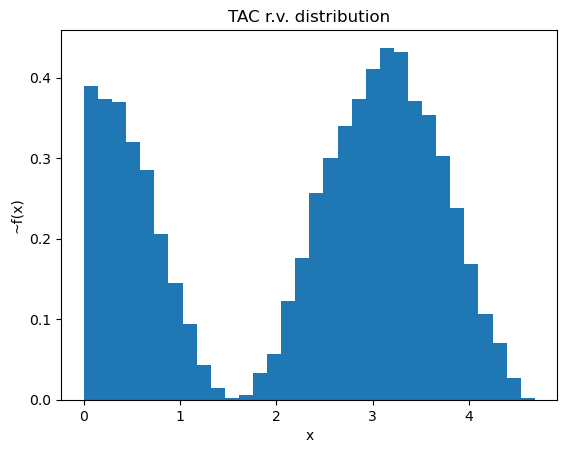

In [166]:
plt.hist(data,bins=sturges(data),density = True)
plt.title("TAC r.v. distribution")
plt.xlabel("x")
plt.ylabel("~f(x)")
plt.show()

Moments of the distribution

In [167]:
mean, var, skew, kurt = stat(data)
print("Moments of the distribution:",mean,var,skew,kurt, sep='\n')

Moments of the distribution:
2.2679828039515884
1.346911324905982
-0.424128938470816
-1.3203487319665002


<h3>Central Limit Teorem

In [168]:
def rand_TCL(N):
    '''returns sigle rand value with TCL'''
    return np.mean([rand_TAC(f,xmin,xmax,1,A=A_0) for i in range(N)])

Moments mean,var,skew,kurt: 
 (2.244117186987235, 0.13913327113051993, -0.05156654353169936, -0.05114638949304018)


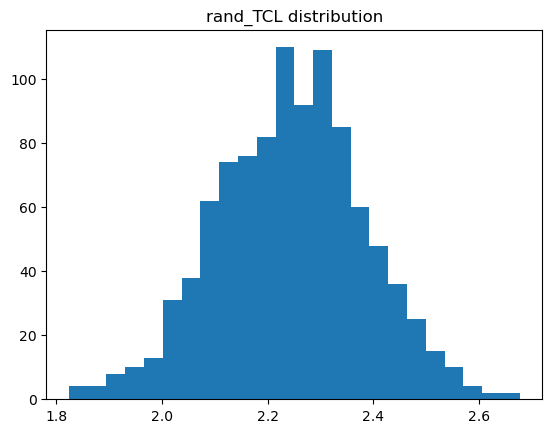

In [169]:
dist = [rand_TCL(100) for i in range(1000)]

plt.hist(dist,bins=sturges(dist))
plt.title("rand_TCL distribution")
print("Moments mean,var,skew,kurt: \n",stat(dist))
plt.show()

Plot of skewness and Kurtosis

In [ ]:
sk,kr = [],[]
x = [10,100,500,1000,1500,3000,4000]
for i in x:
    data = [rand_TCL(100) for j in range(i)]   #x in rand_TCL(x) should also increase but kept fixed for efficiency
    s,k = skewness(data),kurtosis(data)
    sk.append(s)
    kr.append(k)
plt.scatter(x,sk)
plt.scatter(x,kr)
plt.legend(['skewness','kurtosis'])
plt.xlabel('N')
plt.show()

skewn and kurtosis --> 0 for N-->+inf